# Equilibrio

Dado uma fequenca AA, Aa e aa

* Calcular a frequencia alelica
    * A% = AA + (Aa /2)
    * a% = a + (Aa /2)
* Calcular nova frequencia genotipica
    * AA = A ** 2
    * Aa = 2*A*a  
    * aa = a ** 2


## Bibliotecas

In [81]:
from dataclasses import dataclass
from typing import List
from random import random
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
@dataclass
class FrequenciaGenotipica:
    AA: float
    Aa: float
    aa: float
    
    def __eq__(self, f):
        
        return self.AA == f.AA and self.Aa == f.Aa  and self.aa == f.aa
    

@dataclass
class FrequenciaAlelica:
    A: float
    a: float


## Funcionalidades

In [83]:
# Dado uma frequencia genotipica, encontramos a frequencia alelica
def FrequenciaGenotipicaToAlelica(frequencia_gen: FrequenciaGenotipica) -> FrequenciaAlelica:
    half_heter_freq = (frequencia_gen.Aa/2)
    return FrequenciaAlelica(
        A=round(frequencia_gen.AA + half_heter_freq,4),
        a=round(frequencia_gen.aa + half_heter_freq,4),
    )
    
    

def simularGeracao(frequencia_ale: FrequenciaAlelica):
    return FrequenciaGenotipica(
        AA=round(frequencia_ale.A ** 2,4),
        Aa= round(2 * frequencia_ale.A * frequencia_ale.a,4),
        aa= round(frequencia_ale.a ** 2,4),
    )
    
def verificarEquilibrio(populacao: FrequenciaGenotipica, qtd_gen=3):
    geracao: List[FrequenciaGenotipica] = list()
    geracao.append(populacao)
    
    for i in range(qtd_gen):
        frequencia_alelica = FrequenciaGenotipicaToAlelica(populacao)
        populacao = simularGeracao(frequencia_ale=frequencia_alelica)
        print(frequencia_alelica,populacao)
        geracao.append(populacao)
    return geracao

## Funções utilidades

In [84]:
def get_data(frequenciasGenotipica: List[FrequenciaGenotipica]):
    
    data = {}
    
    for i,g in enumerate(frequenciasGenotipica):
        if i == 0:
            data['P'] =[g.AA,g.Aa,g.aa]
            continue
        data[f'F{i}'] =[g.AA,g.Aa,g.aa]
    return data

def plot_populacao_pie(data: List[FrequenciaGenotipica]):
    # Rótulos para as categorias
    categorias = ['AA', 'Aa', 'aa']

    # Configurações para os gráficos
    num_graficos = len(data)
    num_colunas = 3
    num_linhas = (num_graficos + num_colunas - 1) // num_colunas

    fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(num_colunas * 5, num_linhas * 5))

    # Criar cada gráfico de pizza
    for i, (chave, valores) in enumerate(data.items()):
        linha = i // num_colunas
        coluna = i % num_colunas
        axs[linha, coluna].pie(valores, labels=categorias, autopct='%1.2f%%', startangle=140)
        axs[linha, coluna].set_title(f'Geração: {chave}')

    # Remover os eixos dos gráficos vazios (se houver)
    for j in range(i + 1, num_linhas * num_colunas):
        fig.delaxes(axs[j // num_colunas, j % num_colunas])

    # Ajustar layout e mostrar os gráficos
    plt.tight_layout()
    plt.show()

## Casos

FrequenciaAlelica(A=0.64, a=0.36) FrequenciaGenotipica(AA=0.4096, Aa=0.4608, aa=0.1296)
FrequenciaAlelica(A=0.64, a=0.36) FrequenciaGenotipica(AA=0.4096, Aa=0.4608, aa=0.1296)
FrequenciaAlelica(A=0.64, a=0.36) FrequenciaGenotipica(AA=0.4096, Aa=0.4608, aa=0.1296)


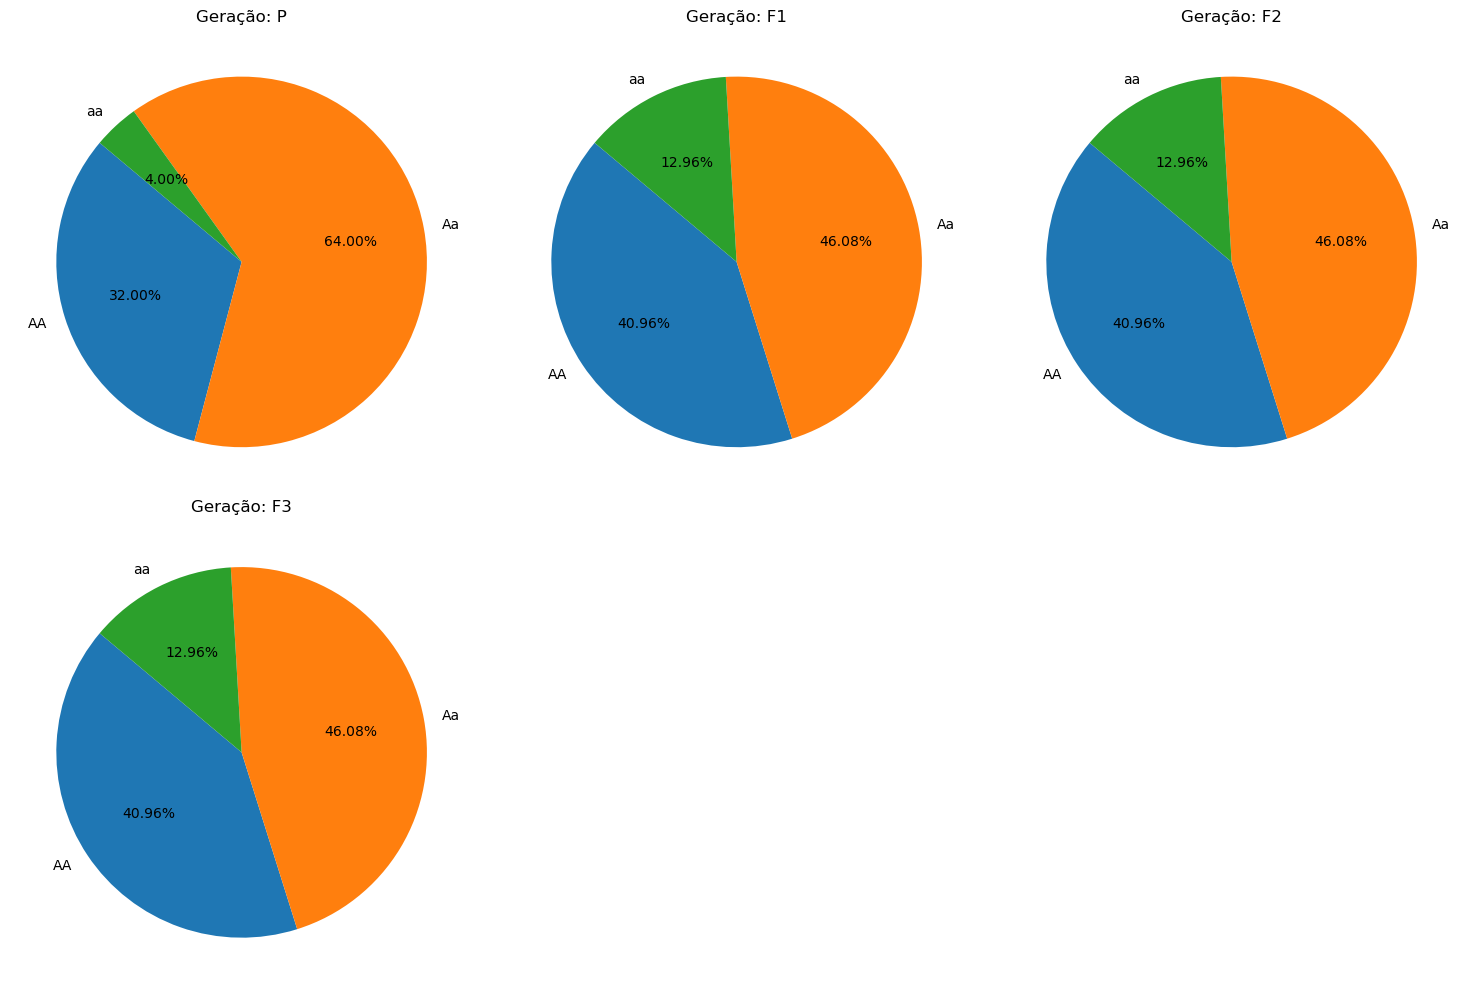

In [85]:
populacao = FrequenciaGenotipica(AA=0.32, Aa=0.64, aa=0.04)

generations = verificarEquilibrio(populacao=populacao,qtd_gen=3)
data = get_data(generations)
plot_populacao_pie(data)

FrequenciaAlelica(A=0.64, a=0.36) FrequenciaGenotipica(AA=0.4096, Aa=0.4608, aa=0.1296)
FrequenciaAlelica(A=0.64, a=0.36) FrequenciaGenotipica(AA=0.4096, Aa=0.4608, aa=0.1296)
FrequenciaAlelica(A=0.64, a=0.36) FrequenciaGenotipica(AA=0.4096, Aa=0.4608, aa=0.1296)


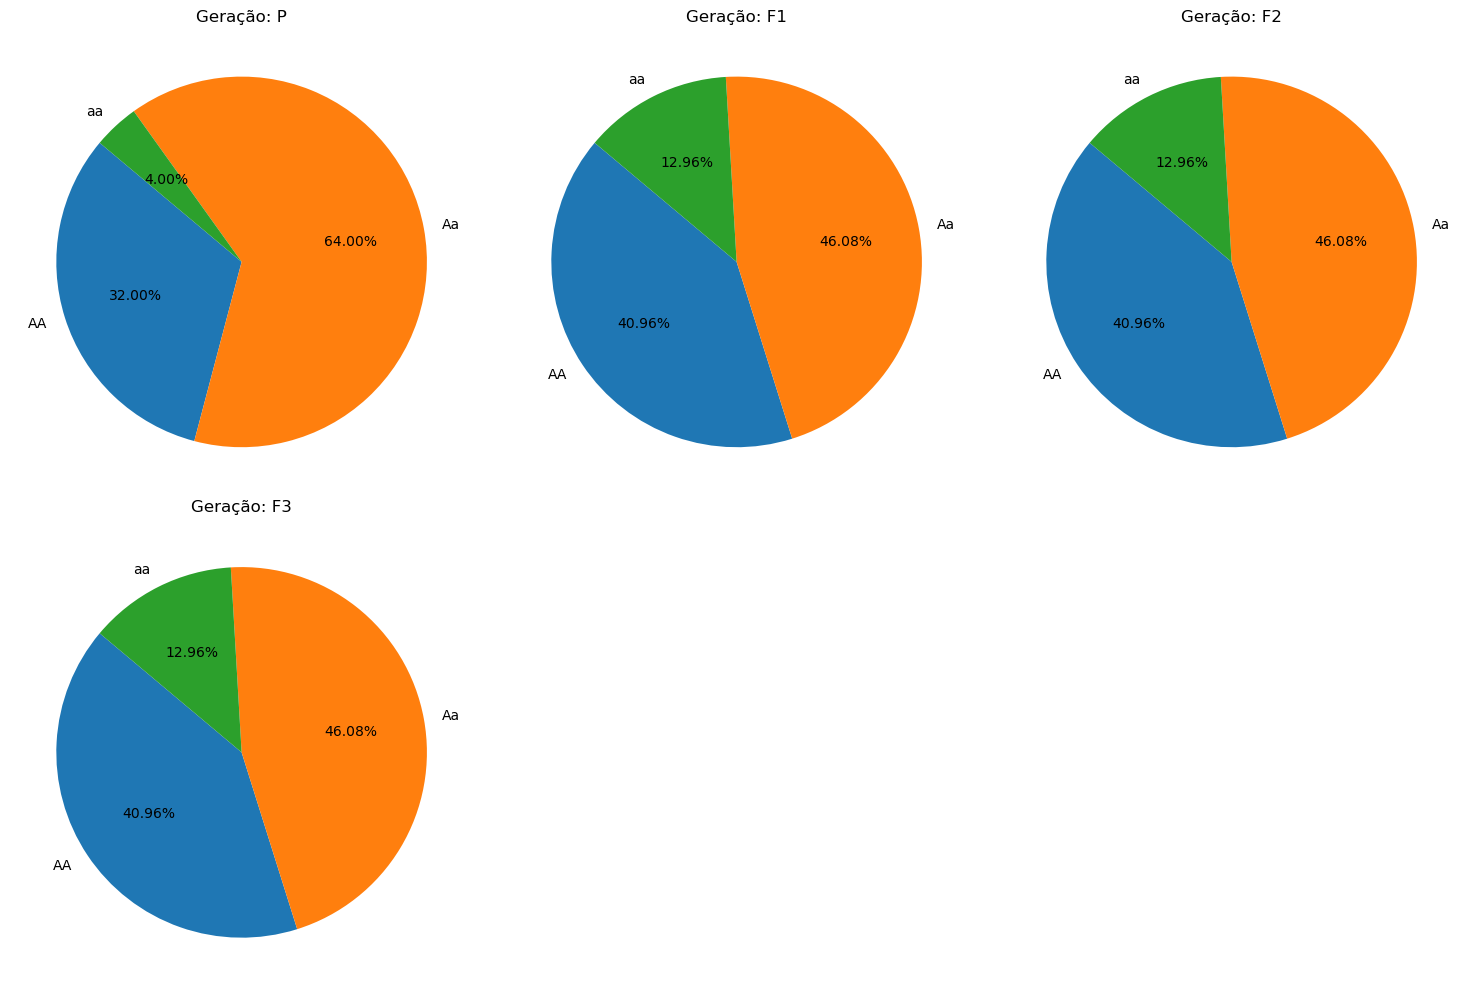

In [86]:
populacao = FrequenciaGenotipica(AA=0.32, Aa=0.64, aa=0.04)
generations = verificarEquilibrio(populacao=populacao,qtd_gen=3)
data = get_data(generations)
plot_populacao_pie(data)

FrequenciaAlelica(A=0.825, a=0.175) FrequenciaGenotipica(AA=0.6806, Aa=0.2887, aa=0.0306)
FrequenciaAlelica(A=0.8249, a=0.1749) FrequenciaGenotipica(AA=0.6805, Aa=0.2886, aa=0.0306)
FrequenciaAlelica(A=0.8248, a=0.1749) FrequenciaGenotipica(AA=0.6803, Aa=0.2885, aa=0.0306)


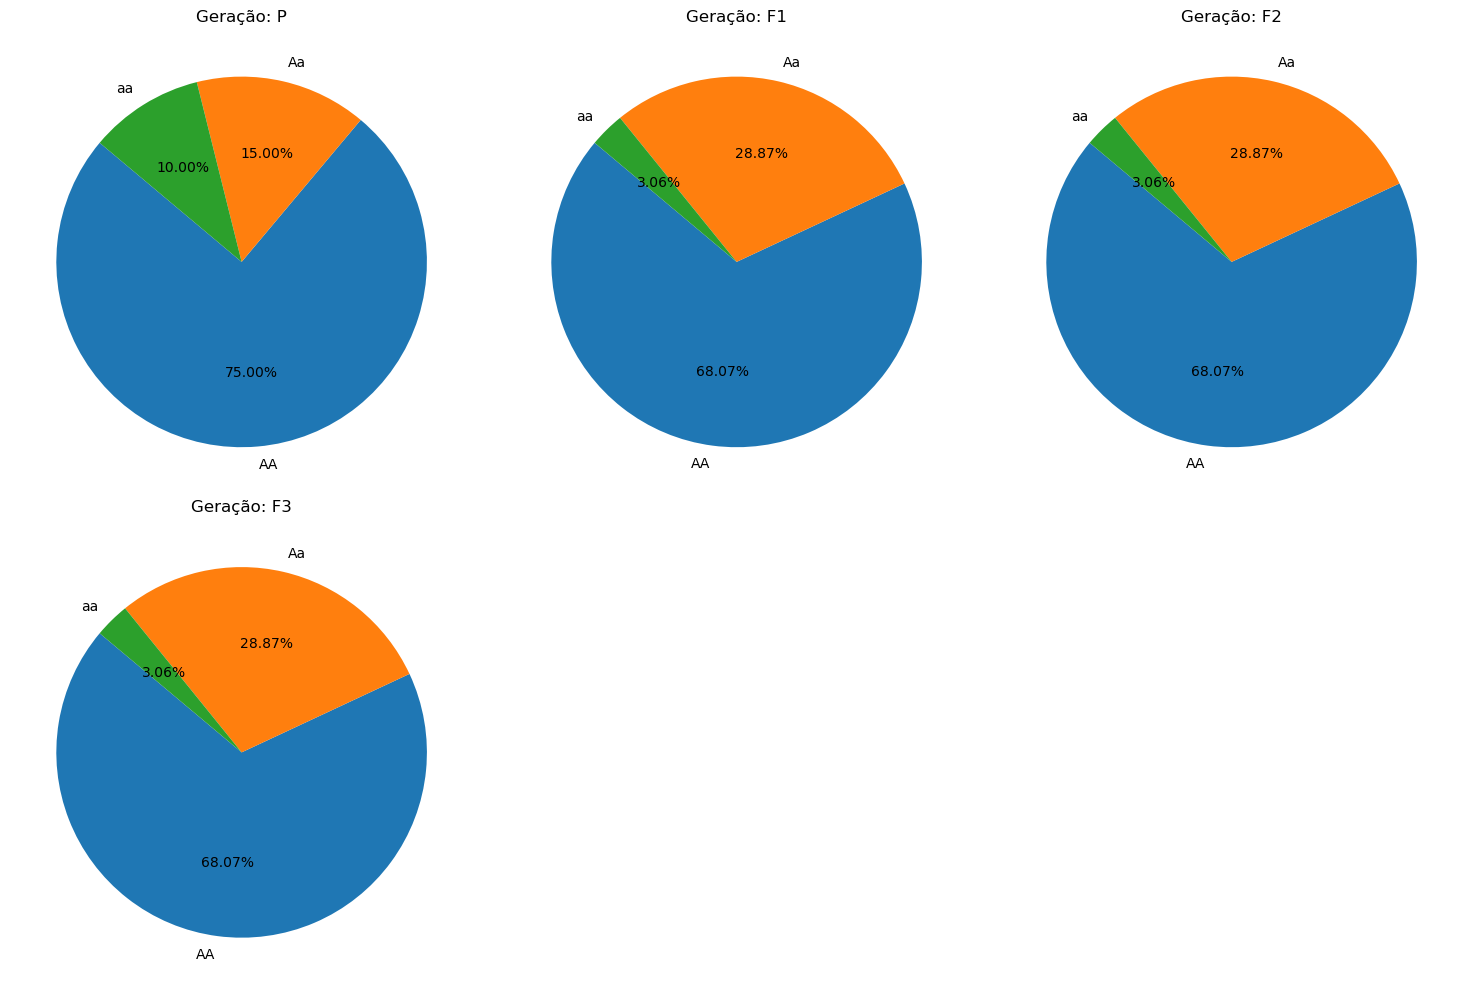

In [87]:
populacao = FrequenciaGenotipica(AA=0.75, Aa=0.15, aa=0.10)
generations = verificarEquilibrio(populacao=populacao,qtd_gen=3)
data = get_data(generations)
plot_populacao_pie(data)